**В начале импортируем нужные библиотеки**

In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package wordnet to /root/nltk_data...


**Читаем файл csv при помощи функции read_csv()**

In [22]:
df = pd.read_csv("bbc-news-data.csv", sep='\t')
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


**При помощи функции drop() удаляем стобец "filename"**

In [4]:
df = df.drop(columns=['filename'], axis=1)

**При помощи регулярного выражения и метода replace() удаляем HTML-теги, знаки препинания, приводим к нижнему регистру в столбце 'title'**

In [5]:
# html_pattern = re.compile('<.*?>')
df['title'] = df['title'].str.replace(r'<[^<>]*>', '', regex=True) # <br> </br> < br/>

In [6]:
df["title"]= df["title"].str.replace("[#,@,&,',-,/,<,>,.,(,)]", "")
df

<ipython-input-6-6276091e1d96>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["title"]= df["title"].str.replace("[#,@,&,',-,/,<,>,.,(,)]", "")


,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BAs profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


In [7]:
df["title"]= df["title"].str.replace('"', '')
df

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BAs profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


In [8]:
df["title"]= df["title"].str.lower()
df

,category,title,content
0,business,ad sales boost time warner profit,Quarterly profits at US media giant TimeWarne...
1,business,dollar gains on greenspan speech,The dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,high fuel prices hit bas profits,British Airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,bt program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,be careful how you code,A new European directive could put software w...
2223,tech,us cyber security chief resigns,The man making sure US computer networks are ...


**Импортируем коллекцию stopwords из модуля nltk.corpus, скачиваем английские "stopwords", удаляем из стобца "title" стоп-слова через цикл**

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_word = stopwords.words('english')
stop_word

df["title"] = df["title"]
filteread_words = []
for token in df["title"]:
  if token not in stop_word:
    filteread_words.append(token)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,category,title,content
0,business,ad sales boost time warner profit,Quarterly profits at US media giant TimeWarne...
1,business,dollar gains on greenspan speech,The dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,high fuel prices hit bas profits,British Airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,bt program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,be careful how you code,A new European directive could put software w...
2223,tech,us cyber security chief resigns,The man making sure US computer networks are ...


**Лемматизация - процесс приведения словоформы к лемме - её нормальной форме. Для того, чтобы лемматизировать, нужно создать экземпляр WordNetLemmatizer() и вызвать функцию lemmatize().**

In [10]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

df['title'] = get_lemmatized_text(df['title'])
df

,category,title,content
0,business,ad sale boost time warner profit,Quarterly profits at US media giant TimeWarne...
1,business,dollar gain on greenspan speech,The dollar has hit its highest level against ...
2,business,yukos unit buyer face loan claim,The owners of embattled Russian oil giant Yuk...
3,business,high fuel price hit ba profit,British Airways has blamed high fuel prices f...
4,business,pernod takeover talk lift domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,bt program to beat dialler scam,BT is introducing two initiatives to help bea...
2221,tech,spam e-mail tempt net shopper,Computer users across the world continue to i...
2222,tech,be careful how you code,A new European directive could put software w...
2223,tech,u cyber security chief resigns,The man making sure US computer networks are ...


**CountVectorizer — это простой способ векторизовать. При его помощи токенизируем данные столбца "title"**

In [11]:
vectorizer = CountVectorizer()
title = vectorizer.fit_transform(df['title'])
df.title = title.toarray()
df

,category,title,content
0,business,0,Quarterly profits at US media giant TimeWarne...
1,business,0,The dollar has hit its highest level against ...
2,business,0,The owners of embattled Russian oil giant Yuk...
3,business,0,British Airways has blamed high fuel prices f...
4,business,0,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,0,BT is introducing two initiatives to help bea...
2221,tech,0,Computer users across the world continue to i...
2222,tech,0,A new European directive could put software w...
2223,tech,0,The man making sure US computer networks are ...


**При помощи регулярного выражения и метода replace() удаляем HTML-теги, знаки препинания, приводим к нижнему регистру в столбце 'content'**

In [12]:
df['content'] = df['content'].str.replace(r'<[^<>]*>', '', regex=True)

In [13]:
df["content"]= df["content"].str.replace("[#,@,&,',-,/,<,>,.,(,)]", "")
df

<ipython-input-13-a6b432b5358f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["content"]= df["content"].str.replace("[#,@,&,',-,/,<,>,.,(,)]", "")


,category,title,content
0,business,0,Quarterly profits at US media giant TimeWarne...
1,business,0,The dollar has hit its highest level against ...
2,business,0,The owners of embattled Russian oil giant Yuk...
3,business,0,British Airways has blamed high fuel prices f...
4,business,0,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,0,BT is introducing two initiatives to help bea...
2221,tech,0,Computer users across the world continue to i...
2222,tech,0,A new European directive could put software w...
2223,tech,0,The man making sure US computer networks are ...


In [14]:
df["content"]= df["content"].str.replace('"', '')
df

,category,title,content
0,business,0,Quarterly profits at US media giant TimeWarne...
1,business,0,The dollar has hit its highest level against ...
2,business,0,The owners of embattled Russian oil giant Yuk...
3,business,0,British Airways has blamed high fuel prices f...
4,business,0,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,0,BT is introducing two initiatives to help bea...
2221,tech,0,Computer users across the world continue to i...
2222,tech,0,A new European directive could put software w...
2223,tech,0,The man making sure US computer networks are ...


In [15]:
df["content"]= df["content"].str.lower()
df

,category,title,content
0,business,0,quarterly profits at us media giant timewarne...
1,business,0,the dollar has hit its highest level against ...
2,business,0,the owners of embattled russian oil giant yuk...
3,business,0,british airways has blamed high fuel prices f...
4,business,0,shares in uk drinks and food firm allied dome...
...,...,...,...
2220,tech,0,bt is introducing two initiatives to help bea...
2221,tech,0,computer users across the world continue to i...
2222,tech,0,a new european directive could put software w...
2223,tech,0,the man making sure us computer networks are ...


**Импортируем коллекцию stopwords из модуля nltk.corpus, скачиваем английские "stopwords", удаляем из стобца "content" стоп-слова через цикл**

In [16]:
nltk.download('stopwords')
stop_word = stopwords.words('english')
stop_word

df["content"] = df["content"]
filteread_words = []
for token in df["content"]:
  if token not in stop_word:
    filteread_words.append(token)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,title,content
0,business,0,quarterly profits at us media giant timewarne...
1,business,0,the dollar has hit its highest level against ...
2,business,0,the owners of embattled russian oil giant yuk...
3,business,0,british airways has blamed high fuel prices f...
4,business,0,shares in uk drinks and food firm allied dome...
...,...,...,...
2220,tech,0,bt is introducing two initiatives to help bea...
2221,tech,0,computer users across the world continue to i...
2222,tech,0,a new european directive could put software w...
2223,tech,0,the man making sure us computer networks are ...


**Лемматизация - процесс приведения словоформы к лемме - её нормальной форме. Для того, чтобы лемматизировать, нужно создать экземпляр WordNetLemmatizer() и вызвать функцию lemmatize(). в столбце 'content'**

In [17]:
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

df['content'] = get_lemmatized_text(df['content'])
df

,category,title,content
0,business,0,quarterly profit at u medium giant timewarner ...
1,business,0,the dollar ha hit it highest level against the...
2,business,0,the owner of embattled russian oil giant yukos...
3,business,0,british airway ha blamed high fuel price for a...
4,business,0,share in uk drink and food firm allied domecq ...
...,...,...,...
2220,tech,0,bt is introducing two initiative to help beat ...
2221,tech,0,computer user across the world continue to ign...
2222,tech,0,a new european directive could put software wr...
2223,tech,0,the man making sure u computer network are saf...


**CountVectorizer — это простой способ векторизовать. При его помощи токенизируем данные столбца "title"**

In [18]:
vectorizer_c = CountVectorizer()
content = vectorizer_c.fit_transform(df['content'])
df.content = content.toarray()
df

,category,title,content
0,business,0,0
1,business,0,0
2,business,0,0
3,business,0,0
4,business,0,0
...,...,...,...
2220,tech,0,0
2221,tech,0,0
2222,tech,0,0
2223,tech,0,0


In [19]:
from sklearn import preprocessing

**При помощи класса LabelEncoder() кодируем категориальные признаки из столбца "category"**

In [20]:
label_encoder = preprocessing.LabelEncoder()
df['category']= label_encoder.fit_transform(df['category'])
df

,category,title,content
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2220,4,0,0
2221,4,0,0
2222,4,0,0
2223,4,0,0


**Импортируем библиотеки, скачиваем стоп-слова, делаем векторизацию, кодирование столбца, разделени на тестовые и тренировочные данные**

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = (stopwords.words('english')) # список стоп-слов
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df.content.values.astype('U'))
y = df['category'].values
le = preprocessing.LabelEncoder()
le.fit(df.category)
df.category = le.transform(df.category)
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from sklearn.linear_model import LogisticRegression

**Логистическая регрессия — это алгоритм классификации машинного обучения, используемый для прогнозирования вероятности категориальной зависимой переменной. Обучаем нашу модель на логистической регрессии**

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
log_reg = lr.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

**При помощи функции accuracy_score определяем точность предсказания**

In [27]:
accuracy_score(log_reg, y_test)

0.9768707482993197

**GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Для начала импортируем библиотеку**

In [28]:
from sklearn.model_selection import GridSearchCV

**Создаём словарь, в который вписываем некоторые параметры логистической регрессии**

In [29]:
parametrs = { 'penalty': ['l1', 'l2'],
              'fit_intercept': range (1,13, 2),
              'max_iter': [100, 200],
              'solver': ['liblinear']}

**Обучаем нашу модель**

In [30]:
grid = GridSearchCV(lr, parametrs, cv=5, error_score='raise')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'fit_intercept': range(1, 13, 2),
                         'max_iter': [100, 200], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

**При помощи атрибута best_params_ определяем лучшие параметры нашей модели**

In [31]:
grid.best_params_

{'fit_intercept': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

**При помощи атрибута best_score_ определяем лучшее значение метрики качества модели, достигнутое при использовании наилучших параметров, найденных в процессе поиска по сетке.**

In [32]:
grid.best_score_

0.9684563758389262

**Переобучаем модель с параметрами**

In [33]:
lr = LogisticRegression(fit_intercept=1, max_iter=100, penalty='l2', solver='liblinear')
lr.fit(X_train, y_train)
log_reg = lr.predict(X_test)

In [34]:
accuracy_score(log_reg, y_test)

0.9741496598639455

**Для построения кривых валидаций для гиперпараметров в Python можно использовать библиотеку scikit-learn; импортируем необходимые пакеты**

In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

**Создаем модель Ridge**

In [36]:
model = Ridge()

**Определяем диапазон значений гиперпараметра fit_intercept и сторим кривые валидации**

In [37]:
param_range = [False, False]
train_scores, test_scores = validation_curve(LogisticRegression(),
                                  X, y, param_name="fit_intercept", param_range=param_range,
                                  cv=5, scoring="accuracy")

**При помощи matplotlib сторим график валидации**

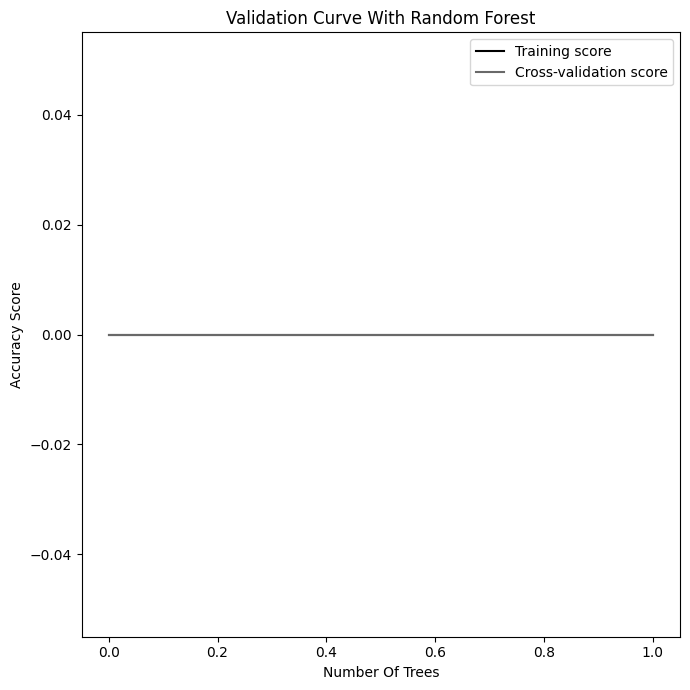

In [38]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, label="Training score", color="black")
plt.plot(param_range, label="Cross-validation score", color="dimgrey")

# plt.fill_between(param_range, color="gray")
# plt.fill_between(param_range, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

**Определяем диапазон значений гиперпараметра max_iter и сторим кривые валидации**

In [ ]:
param_range = np.arange(100, 200)
train_scores, test_scores = validation_curve(LogisticRegression(),
                                  X, y, param_name="max_iter", param_range=param_range,
                                  cv=5, scoring="accuracy")

**При помощи matplotlib сторим график валидации**

In [ ]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, label="Training score", color="black")
plt.plot(param_range, label="Cross-validation score", color="dimgrey")

# plt.fill_between(param_range, color="gray")
# plt.fill_between(param_range, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()